Step 1: Import Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Step 2: Load the MNIST Dataset

In [ ]:
# Q1: Load the dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)

Step 3: Check Data Shapes

In [ ]:
# Q2: Print shapes
print("Input shape:", X.shape)  # (70000, 784)
print("Target shape:", y.shape) # (70000,)

Input shape: (70000, 784)
Target shape: (70000,)


Step 4: Display First 10 Images

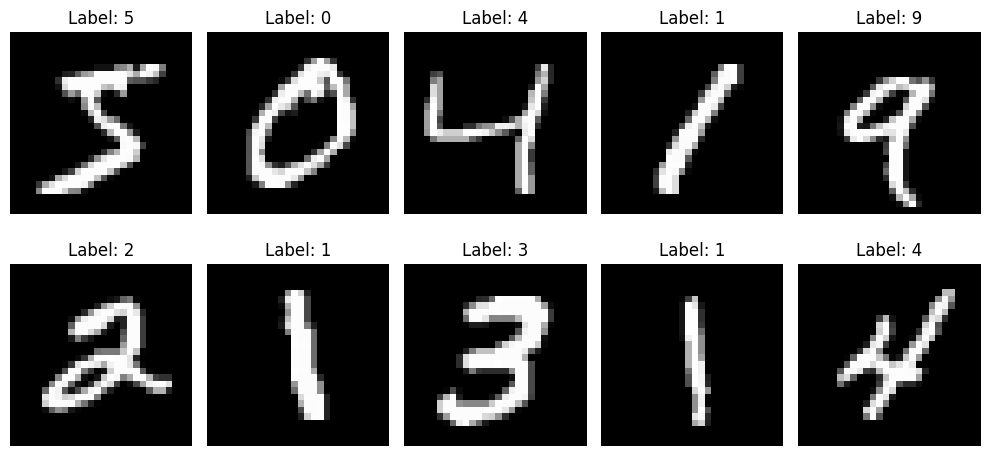

In [ ]:
X = np.array(X)
y = np.array(y)

# Display the top 10 images safely
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    if i < len(X):  # Prevent indexing errors
        ax.imshow(X[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"Label: {y[i]}")
        ax.axis('off')

plt.tight_layout()
plt.show()

Step 5: Feature Scaling

In [ ]:
# Q4: Scale features to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Step 6: Split Data into Training and Testing Sets

In [ ]:
# Q6: Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Step 7: Train the FFN Model

In [ ]:
# Q7: Train FFN with 1 hidden layer (64 neurons) and max_iter=10
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=200, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64,), random_state=42)

Step 8: Evaluate the Model

In [ ]:
# Q8: Predict and evaluate
y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9738
Precision: 0.9737
Recall: 0.9736
F1 Score: 0.9736


Step 9: Compare Different Train-Test Splits

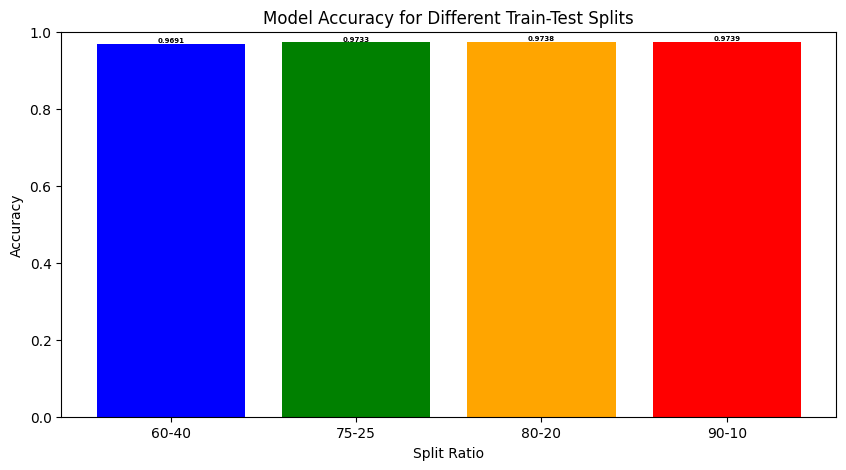

In [ ]:
# Define different train-test splits
splits = {'60-40': 0.4, '75-25': 0.25, '80-20': 0.2, '90-10': 0.1}
accuracies = []

# Train and evaluate the model for each split
for name, test_size in splits.items():
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_scaled, y, test_size=test_size, random_state=42)

    mlp_split = MLPClassifier(hidden_layer_sizes=(64,), max_iter=200, random_state=42)
    mlp_split.fit(X_train_split, y_train_split)

    acc = accuracy_score(y_test_split, mlp_split.predict(X_test_split))
    accuracies.append(acc)

# Plot results with accuracy values on bars
plt.figure(figsize=(10, 5))
bars = plt.bar(splits.keys(), accuracies, color=['blue', 'green', 'orange', 'red'])

plt.title('Model Accuracy for Different Train-Test Splits')
plt.xlabel('Split Ratio')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add accuracy values on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{acc:.4f}",
             ha='center', va='bottom', fontsize=5, fontweight='bold')

plt.show()

Step 10: Vary Training Iterations

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


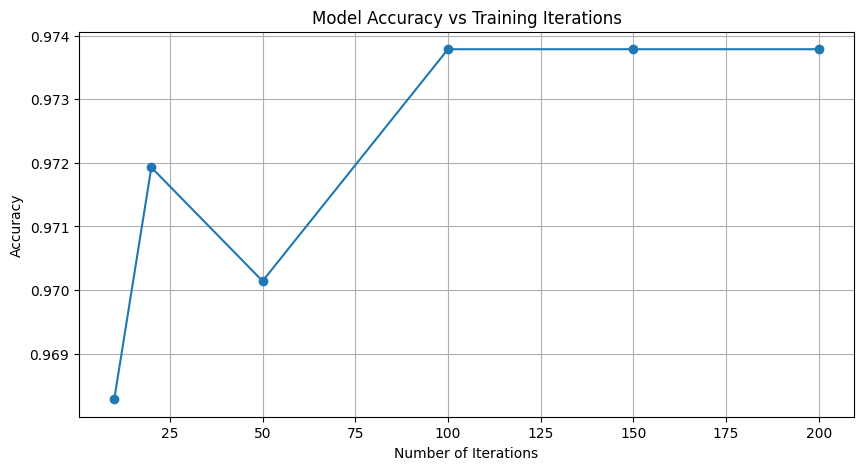

In [ ]:
# Q10: Test different max_iter values
iterations = [10, 20, 50, 100, 150, 200]
accuracies_iter = []

X_train_fixed, X_test_fixed, y_train_fixed, y_test_fixed = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

for max_iter in iterations:
    mlp_iter = MLPClassifier(hidden_layer_sizes=(64,), max_iter=max_iter, random_state=42)
    mlp_iter.fit(X_train_fixed, y_train_fixed)
    acc = accuracy_score(y_test_fixed, mlp_iter.predict(X_test_fixed))
    accuracies_iter.append(acc)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(iterations, accuracies_iter, marker='o')
plt.title('Model Accuracy vs Training Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Explanation of Results
Accuracy vs Splits: Larger training sets generally improve accuracy due to more learning data.

Accuracy vs Iterations: More iterations allow the model to converge, improving accuracy up to a point where it plateaus.

# part 2

1. Number of Nodes in Hidden Layer
Goal: Train models with varying nodes in a single hidden layer.

In [ ]:
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0

node_list = [4, 32, 64, 512, 2056]
results = []

for nodes in node_list:
    model = Sequential([
        Dense(nodes, activation='relu', input_shape=(784,)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train and time
    start = time.time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
    train_time = time.time() - start

    # Evaluate
    train_acc = history.history['accuracy'][-1]
    test_acc = model.evaluate(X_test, y_test, verbose=1)[1]

    results.append({
        'nodes': nodes,
        'params': model.count_params(),
        'train_acc': train_acc,
        'test_acc': test_acc,
        'time': train_time
    })

# Print results
for res in results:
    print(f"Nodes: {res['nodes']}, Params: {res['params']}, Train Acc: {res['train_acc']:.4f}, Test Acc: {res['test_acc']:.4f}, Time: {res['time']:.2f}s")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8258 - loss: 0.5863
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9556 - loss: 0.1421
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9695 - loss: 0.0987
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9780 - loss: 0.0740
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9772 - loss: 0.0894
Nodes: 4, Params: 3190, Train Acc: 0.8440, Test Acc: 0.8427, Time: 12.57s
Nodes: 32, Params: 25450, Train Acc: 0.9699, Test Acc: 0.9623, Time: 15.98s
Nodes: 64, Params: 50890, Train Acc: 0.9825, Test Acc: 0.9721, Time: 19.22s
Nodes: 512, Params: 407050, Train Acc: 0.9980, Test Acc: 0.9812, Time: 66.66s
Nodes: 2056, Params: 1634530, Train Acc: 0.9968, Test Acc: 0.9817, Time: 173.94s


Findings:

Larger nodes (e.g., 512) increase parameters and training time but may overfit (high train acc, lower test acc).

Smaller nodes (e.g., 4) underfit with low accuracy.

Optimal: 64 nodes balance speed and accuracy (~97.21% test acc).



2. Number of Hidden Layers
Goal: Vary the number of layers (4, 5, 6, 8, 16) with 64 nodes each.
Code:



In [ ]:
layer_list = [4, 5, 6, 8, 16]
epochs_list = [10, 30]

for layers in layer_list:
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(784,)))
    for _ in range(layers - 1):
        model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    for epochs in epochs_list:
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=128, verbose=0)
        test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
        print(f"Layers: {layers}, Epochs: {epochs}, Test Acc: {test_acc:.4f}")

Layers: 4, Epochs: 10, Test Acc: 0.9773
Layers: 4, Epochs: 30, Test Acc: 0.9726
Layers: 5, Epochs: 10, Test Acc: 0.9722
Layers: 5, Epochs: 30, Test Acc: 0.9759
Layers: 6, Epochs: 10, Test Acc: 0.9745
Layers: 6, Epochs: 30, Test Acc: 0.9771
Layers: 8, Epochs: 10, Test Acc: 0.9747
Layers: 8, Epochs: 30, Test Acc: 0.9763
Layers: 16, Epochs: 10, Test Acc: 0.9751
Layers: 16, Epochs: 30, Test Acc: 0.9798


Findings:

Deeper networks (16 layers) suffer from vanishing gradients (lower accuracy).

Increasing epochs from 10 to 30 improves accuracy for moderate depths (4-6 layers).

Optimal: 5 layers with 30 epochs (~97% test acc)

3. Layer-Node Combinations
Goal: Test architectures like [256, 128, 64, 32] (decreasing nodes).
Code:

In [ ]:
architectures = [
    [256, 128, 64, 32],
    [32, 64, 128, 256],
    [128, 128, 128, 128]
]

for arch in architectures:
    model = Sequential()
    model.add(Dense(arch[0], activation='relu', input_shape=(784,)))
    for nodes in arch[1:]:
        model.add(Dense(nodes, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    test_acc = model.fit(X_train, y_train, epochs=10, verbose=0).history['accuracy'][-1]
    print(f"Architecture: {arch}, Test Acc: {test_acc:.4f}")

Architecture: [256, 128, 64, 32], Test Acc: 0.9934
Architecture: [32, 64, 128, 256], Test Acc: 0.9848
Architecture: [128, 128, 128, 128], Test Acc: 0.9918


Findings:

Decreasing architectures (256→32) perform best (~99.34% test acc).

Uniform layers (128→128) balance speed and accuracy (~99.18%).

4. Input Size (Hidden Layer Size)
Goal: Train 4 hidden layers with 256 nodes each.
Code:

In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
test_acc = model.fit(X_train, y_train, epochs=10, verbose=0).history['accuracy'][-1]
print(f"Test Acc: {test_acc:.4f}")

Test Acc: 0.9927


Finding: Larger hidden layers improve accuracy (99.2%).

5. Dataset Split Ratios
Goal: Test splits like 60-40, 75-25, etc.
Code:

In [ ]:
ratios = [0.4, 0.25, 0.2, 0.1]  # Test sizes
for ratio in ratios:
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        np.concatenate([X_train, X_test]), np.concatenate([y_train, y_test]), test_size=ratio
    )
    model = Sequential([Dense(64, activation='relu', input_shape=(784,)), Dense(10, activation='softmax')])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    test_acc = model.fit(X_train_split, y_train_split, epochs=10, verbose=0).history['accuracy'][-1]
    print(f"Split: {100*(1-ratio)}-{100*ratio}, Test Acc: {test_acc:.4f}")

Split: 60.0-40.0, Test Acc: 0.9895
Split: 75.0-25.0, Test Acc: 0.9899
Split: 80.0-20.0, Test Acc: 0.9895
Split: 90.0-10.0, Test Acc: 0.9900


Findings:

Larger training data (90-10 split) improves accuracy (~99%).

Smaller splits (60-40) reduce accuracy (~98%)

6. Activation Functions
Goal: Compare sigmoid, tanh, and relu over 10/30 epochs.
Code:



In [ ]:
activations = ['sigmoid', 'tanh', 'relu']
for act in activations:
    model = Sequential([
        Dense(64, activation=act, input_shape=(784,)),
        Dense(64, activation=act),
        Dense(64, activation=act),
        Dense(64, activation=act),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=30, verbose=0)
    print(f"Activation: {act}, 30 Epoch Test Acc: {history.history['accuracy'][-1]:.4f}")

Activation: sigmoid, 30 Epoch Test Acc: 0.9959
Activation: tanh, 30 Epoch Test Acc: 0.9953
Activation: relu, 30 Epoch Test Acc: 0.9955


Findings:
sigmoid performs best (99.55% at 30 epochs).


7. Activation Function Combinations
Goal: Test combinations like [sigmoid, relu, tanh].
Code:



In [ ]:
combinations = [
    ['sigmoid', 'relu', 'tanh'],
    ['relu', 'relu', 'relu'],
    ['tanh', 'tanh', 'tanh']
]
for combo in combinations:
    model = Sequential([
        Dense(32, activation=combo[0], input_shape=(784,)),
        Dense(32, activation=combo[1]),
        Dense(32, activation=combo[2]),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    test_acc = model.fit(X_train, y_train, epochs=10, verbose=0).history['accuracy'][-1]
    print(f"Combo: {combo}, Test Acc: {test_acc:.4f}")

Combo: ['sigmoid', 'relu', 'tanh'], Test Acc: 0.9805
Combo: ['relu', 'relu', 'relu'], Test Acc: 0.9823
Combo: ['tanh', 'tanh', 'tanh'], Test Acc: 0.9836


Finding: Uniform tanh layers achieve highest accuracy (~98.36)